<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-5-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df = pd.read_csv(boston_url)

<class 'pandas.errors.EmptyDataError'>: No columns to parse from file

#### Add your code below following the instructions given in the course to complete the peer graded assignment


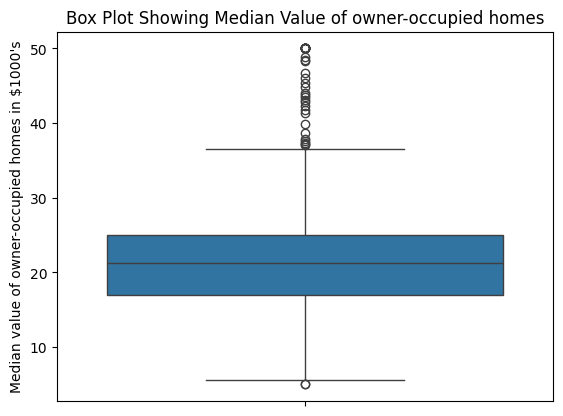

In [9]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("Box Plot Showing Median Value of owner-occupied homes")
pyplot.ylabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

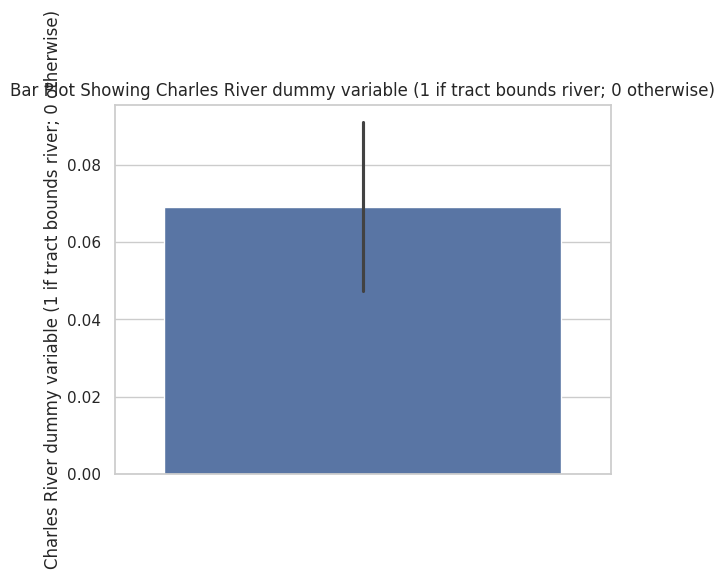

In [8]:
ax = sns.barplot(y="CHAS", data=boston_df)
pyplot.title("Bar Plot Showing Charles River dummy variable (1 if tract bounds river; 0 otherwise)")
pyplot.ylabel("Charles River dummy variable (1 if tract bounds river; 0 otherwise)")
pyplot.show()

In [19]:
river_bound = boston_df.loc[boston_df['CHAS']==1,'MEDV']
river_away = boston_df.loc[boston_df['CHAS']==0,'MEDV']
t_stat,p_val = scipy.stats.ttest_ind(river_bound,river_away,equal_var=False)
print("T-statistic:",t_stat)
print("P-value:",p_val)
if p_val < 0.05:
  print("There is significant difference in the median difference in median value of houses bounded by the Charles river")
else:
  print("There is no significant difference in the median difference in median value of houses bounded by the Charles river")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
There is significant difference in the median difference in median value of houses bounded by the Charles river


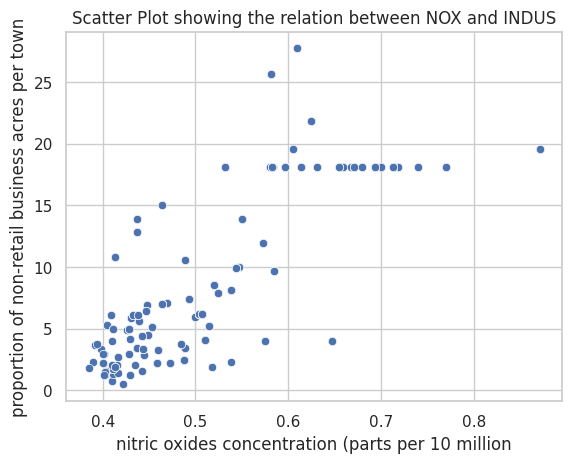

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [15]:
ax = sns.scatterplot(x='NOX', y='INDUS',data=boston_df)
pyplot.title("Scatter Plot showing the relation between NOX and INDUS")
pyplot.xlabel("nitric oxides concentration (parts per 10 million")
pyplot.ylabel("proportion of non-retail business acres per town")
pyplot.show()
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

Since, p-value<0.05 and pearson r statistic is 0.763, we conclude that there is a positive linear relationship between nitric oxide concentration and proportion of non-retail business acres per town.

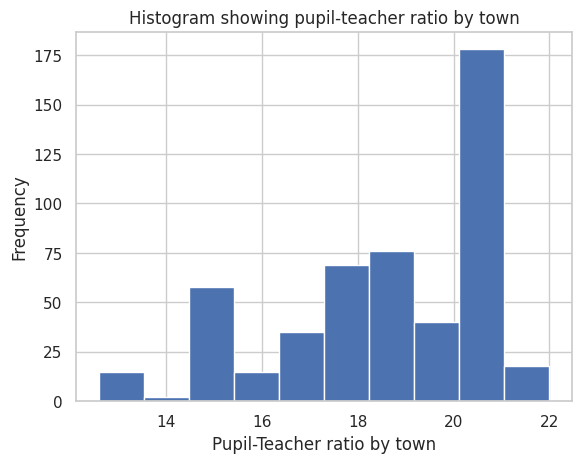

In [12]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title("Histogram showing pupil-teacher ratio by town")
pyplot.xlabel("Pupil-Teacher ratio by town")
pyplot.ylabel("Frequency")
pyplot.show()

In [38]:
scipy.stats.levene(boston_df[boston_df['AGE'] == 'before 1940']['MEDV'],
                   boston_df[boston_df['AGE'] == 'after 1940']['MEDV'],
                   center='mean')

/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


LeveneResult(statistic=nan, pvalue=nan)

Ho: beta 1 = 0 (there is no impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

H1: beta 1 not equal to 0 (there is impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)